**Hate Speech Detection**

**Objective -**

*In this assignment, we will apply NLP techniques to build a hate speech detection model, so we will -*

1) load and explore the dataset

2) process text data

3) extract the features

4) train the classifier and evaluate its performance

**Task 1 : Data Loading and Exploration**

*(a) Load the Dataset*

we start loading the data using pandas

In [ ]:
from google.colab import files
import pandas as pd

print("upload necessary files!")
uploaded=files.upload()

try:
  train_data_df=pd.read_csv('/content/train_data.csv')
  test_df=pd.read_csv('/content/test.csv')
  print("Files loaded successfully!")

except FileNotFoundError:
  print("File not found. Please upload the files again.")

except Exception as e:
  print("Error loading files:", e)

upload necessary files!


Saving test.csv to test.csv
Saving train_data.csv to train_data.csv
Files loaded successfully!


*(b) Explore Dataset*

check distribution of hate speech (HS=1) vs not hate speech (HS=0)

first few rows of the dataset!
     id                                               text  HS
0  6452  @indigomermaidd You're the exception , you wer...   1
1  4884  If a woman doesn't want you just unleash your ...   1
2  1931  Son of Jamestown, Protestants that made the US...   0
3  4942  Literally just got hit by a car bc this dumb b...   1
4  4721  charli: fuck you bitch charli: omg why am i so...   1
class distribution:
HS
0    3455
1    2544
Name: count, dtype: int64


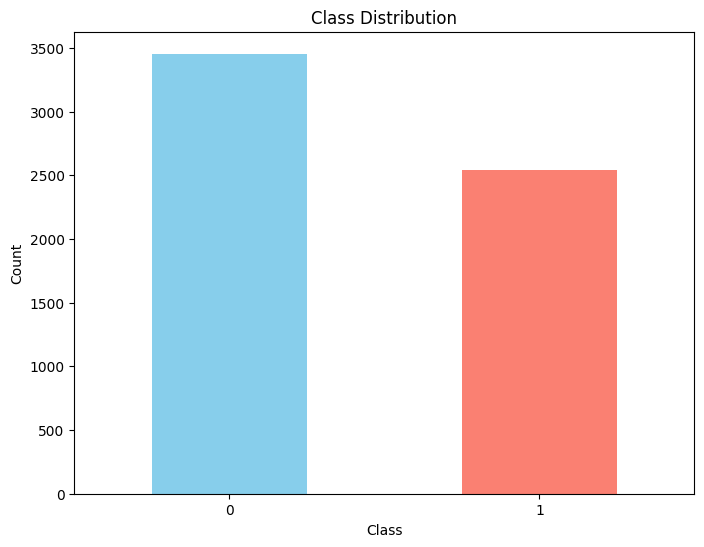

In [ ]:
import matplotlib.pyplot as plt

print("first few rows of the dataset!")
print(train_data_df.head())

class_distribution=train_data_df['HS'].value_counts()
print("class distribution:")
print(class_distribution)

plt.figure(figsize=(8, 6))
class_distribution.plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

**Task 2 : Text Processing**

*(a) Tokenization*

we will use nltk to tokenize the text data using word_tokenize to split sentence into words

In [ ]:
import nltk
from nltk.tokenize import word_tokenize
nltk.download("punkt_tab")

def tokenize_text(text):
  return word_tokenize(text.lower())

print("tokenization sample: ")
sample_text=train_data_df['text'].iloc[0]
print(f"original: {sample_text}")
print(f"tokenized: {tokenize_text(sample_text)}")

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


tokenization sample: 
original: @indigomermaidd You're the exception , you weren't a rude lil cunt like some hoes. ðŸ™ƒðŸ’•
tokenized: ['@', 'indigomermaidd', 'you', "'re", 'the', 'exception', ',', 'you', 'were', "n't", 'a', 'rude', 'lil', 'cunt', 'like', 'some', 'hoes', '.', 'ðÿ™ƒðÿ', '’', '•']


*(b) Stop Word Removal*

In [ ]:
from nltk.corpus import stopwords
nltk.download("stopwords")

stop_words=set(stopwords.words('english'))

def preprocess_the_text(text):
  tokens=word_tokenize(text.lower())
  tokens=[token for token in tokens if token not in stop_words and token.isalnum()]
  return tokens

print("stop word removal sample: ")
print(f"original: {sample_text}")
print(f"processed: {preprocess_the_text(sample_text)}")

stop word removal sample: 
original: @indigomermaidd You're the exception , you weren't a rude lil cunt like some hoes. ðŸ™ƒðŸ’•
processed: ['indigomermaidd', 'exception', 'rude', 'lil', 'cunt', 'like', 'hoes']


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


*(c) Stemming*

In [ ]:
from nltk.stem import PorterStemmer

stemmer=PorterStemmer()

def stem_tokens(tokens):
  words=word_tokenize(tokens.lower())
  words=[word for word in words if word not in stop_words and word.isalnum()]
  stemmed_words=[stemmer.stem(word) for word in words]
  return ' '.join(stemmed_words)

train_data_df['processed_text']=train_data_df['text'].apply(stem_tokens)
test_df['processed_text']=test_df['text'].apply(stem_tokens)

print("\nstemming sample: ")
print(train_data_df[['text', 'processed_text']].head())


stemming sample: 
                                                text  \
0  @indigomermaidd You're the exception , you wer...   
1  If a woman doesn't want you just unleash your ...   
2  Son of Jamestown, Protestants that made the US...   
3  Literally just got hit by a car bc this dumb b...   
4  charli: fuck you bitch charli: omg why am i so...   

                                      processed_text  
0       indigomermaidd except rude lil cunt like hoe  
1  woman want unleash charm women weak cave almos...  
2  son jamestown protest made usa conserv presid ...  
3  liter got hit car bc dumb blond bitch phone ev...  
4        charli fuck bitch charli omg extra wjahjaaj  


**Note** - I chose stemming over lemmatization for speed and simplicity. Stemming reduces words to their root form like for example "spinning" -> "spin" which is sufficient for this classification task.

**Task 3 : Feature Extraction**

*(a) Bag-of-Words (BoW) representation*

we will first split the data for validation then initialize the bow vector then fit and transform the training data.

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

x_train, x_val, y_train, y_val = train_test_split(train_data_df['processed_text'],train_data_df['HS'],test_size=0.2,random_state=42)

bow_vectorizer=CountVectorizer(max_features=5000)

x_train_bow=bow_vectorizer.fit_transform(x_train)
x_val_bow=bow_vectorizer.transform(x_val)
x_test_bow=bow_vectorizer.transform(test_df['processed_text'])

print("bow feature shape: ", x_train_bow.shape)

bow feature shape:  (4799, 5000)


*(b) TF-IDf Representation*

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer=TfidfVectorizer(ngram_range=(1,2))

x_train_tfidf=tfidf_vectorizer.fit_transform(x_train)
x_val_tfidf=tfidf_vectorizer.transform(x_val)
x_test_tfidf=tfidf_vectorizer.transform(test_df['processed_text'])

print("tfidf feature shape: ", x_train_tfidf.shape)

tfidf feature shape:  (4799, 56314)


**Task 4 : Model Training and Evaluation**

*(a) Train a Classifier*

we will first choose a suitable classifier for text classification - **Naive Bayes**

then we will train it on both Bow and TF-IDF features

In [ ]:
from sklearn.naive_bayes import MultinomialNB

nb_bow=MultinomialNB()
nb_bow.fit(x_train_bow, y_train)
y_val_pred_bow=nb_bow.predict(x_val_bow)

nb_tdif=MultinomialNB()
nb_tdif.fit(x_train_tfidf, y_train)
y_val_pred_tfidf=nb_tdif.predict(x_val_tfidf)

print("models trained successfully")

models trained successfully


*(b) Evaluate the Model*

In [ ]:
from sklearn.metrics import classification_report

print("classification report for bow features:")
print(classification_report(y_val, y_val_pred_bow))

print("classification report for tfidf features:")
print(classification_report(y_val, y_val_pred_tfidf))

test_predictions_bow=nb_bow.predict(x_test_bow)
test_predictions_tfidf=nb_tdif.predict(x_test_tfidf)

submission=pd.DataFrame({'id': test_df['id'], 'HS': test_predictions_tfidf})
submission.to_csv('solution.csv', index=False)
print("submission file saved successfully!")

classification report for bow features:
              precision    recall  f1-score   support

           0       0.80      0.75      0.77       711
           1       0.67      0.73      0.69       489

    accuracy                           0.74      1200
   macro avg       0.73      0.74      0.73      1200
weighted avg       0.74      0.74      0.74      1200

classification report for tfidf features:
              precision    recall  f1-score   support

           0       0.74      0.90      0.81       711
           1       0.78      0.53      0.63       489

    accuracy                           0.75      1200
   macro avg       0.76      0.71      0.72      1200
weighted avg       0.75      0.75      0.74      1200

submission file saved successfully!


**Discussion** - Bag of Words (BoW) tends to give too much importance to frequently occurring words, which can sometimes overshadow meaningful terms. In contrast, TF-IDF adjusts for this by assigning higher weights to rare but informative words, often resulting in improved precision and recall.